# Proyecto de Machine Learning 

### Curso de inteligencia artificial
#### Presentado a:
Prof. Andres Mauricio Castillo
#### Presentado por:
- Valeria Rivera Muñoz - 1626837
- Juan Felipe Gil Londoño - 1626055
- Mateo Gregory Jimenez - 1629431
    
### Objetivo del proyecto:
    Aplicar el concepto de aprendizaje de máquina para resolver un problema de clasificación usando los métodos vistos en el curso. 

### Obtencion de los datos:
###### Los datos se obtuvieron los datos del siguiente enlace: [Heart_disease_target](https://www.kaggle.com/ronitf/heart-disease-uci)

# Instalacion de paquetes necesarios

In [1]:
!pip install pydotplus
!pip install graphviz
!pip install pydotplus
!pip install graphviz
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install numpy
!conda install -c anaconda graphviz --yes

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



# Adicionar librerias necesarias
En las siguientes lineas se agregaran todas las librerias necesarias para nuestro proyecto

En el siguiente bloque de codigo se importaran las librerias relacionadas con el manejo de datos de nuestro clasificador

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
import copy

En este bloque se importaran las librearias relacionadas con los modelos de apredizaje de maquina

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import datetime

En este bloque se importaran las librearias relacionadas con la visualizacion de los modelos generados por los algoritmos de aprendizaje de maquina

In [4]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Leer los datos

Ahora procedemos a cargar los datos del archivo "Heart_disease_target.csv" donde se encuentran todos los datos necesarios para empezar con los metodos de clasificación

In [5]:
train_target=pd.read_csv("./Heart_disease_target.csv")

# Entender los datos

In [6]:
print(train_target.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Como se puede observar en el output anterior no es necesario hacer ninguna conversion de las variables categoricas, ya que estas ya estan interpretadas y convertidas

## Tipos de Variables
### Numericas
- Age: Es la edad del paciente en años
- trestbps: Presión arterial en reposo en mmHg(milimetro de mercurio) al ingreso al hospital
- chol: Colesterol sérico en mg/dl (miligramo por decalitro)
- Thalach: Frecuencia cardíaca máxima alcanzada
- Oldpeak: Depresión del ST inducida por el ejercicio relativo al descanso
- ca: Número de vasos principales (0-3) coloreados por flourosopía

### Categoricas
- Sex: Sexo del paciente (1:M, 0:F)
- Cp: Tipo de dolor en el pecho (0,1,2,3)
- Fbs: Azúcar en sangre en ayunas > 120 mg/dl (1:True, 0:False)
- Restecg: Resultados del electrocardiograma en reposo
- Exang: Angina inducida por ejercicio (1:Sí; 0:No)
- Slope: La pendiente del segmento pico del ejercicio ST
- Thal: 1:Normal, 2:Defecto fijo, 3:Defecto reversible (La interpretacion puede ser ambigua debido a que en el conjunto de datos hay un valor 0, pero no significa nada realmente por lo tanto decidimos remover esta columna)

In [7]:
train_target.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Graficamos un histograma de los datos de cada columna que posee el data set, son un total de 13 columnas

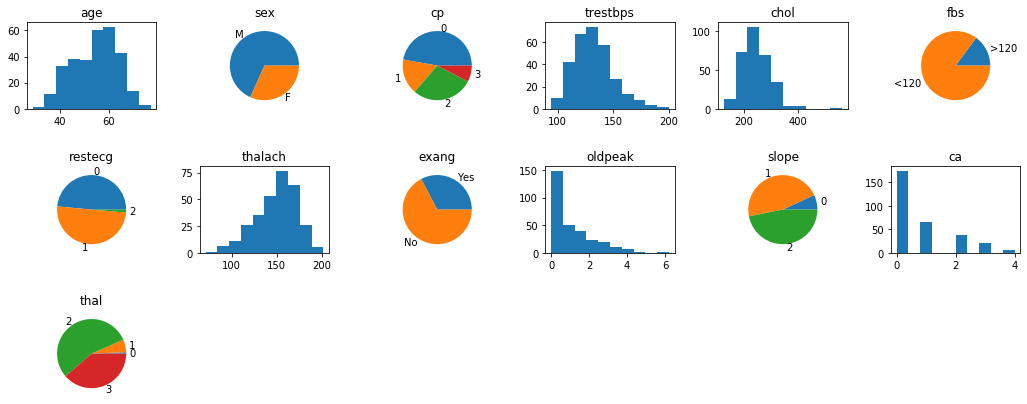

In [8]:
columns=list(train_target.columns)
del(columns[len(columns)-1])

ax1 = plt.axes([0.0, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[0]].dropna())
plt.title(columns[0])

ax2 = plt.axes([0.4, 1.0, 0.3, 0.3])
sexCount=[(train_target[columns[1]]==1).sum(),(train_target[columns[1]]==0).sum()]
_ = plt.pie(sexCount, labels=['M','F'])
plt.title(columns[1])

ax3 = plt.axes([0.8, 1.0, 0.3, 0.3])
cpCount=[(train_target[columns[2]]==0).sum(),(train_target[columns[2]]==1).sum(),
          (train_target[columns[2]]==2).sum(),(train_target[columns[2]]==3).sum()]
_ = plt.pie(cpCount, labels=['0','1','2','3'])
plt.title(columns[2])

ax4 = plt.axes([1.2, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[3]].dropna())
plt.title(columns[3])

ax5 = plt.axes([1.6, 1.0, 0.3, 0.3])
_ = plt.hist(train_target[columns[4]].dropna())
plt.title(columns[4])

ax6 = plt.axes([2.0, 1.0, 0.3, 0.3])
fbsCount=[(train_target[columns[5]]==1).sum(),(train_target[columns[5]]==0).sum()]
_ = plt.pie(fbsCount, labels=['>120','<120'])
plt.title(columns[5])

ax7 = plt.axes([0.0, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[6]]==0).sum(),(train_target[columns[6]]==1).sum(),(train_target[columns[6]]==2).sum()]
_ = plt.pie(restecgCount, labels=['0','1','2'])
plt.title(columns[6])

ax8 = plt.axes([0.4, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[7]].dropna())
plt.title(columns[7])

ax9  = plt.axes([0.8, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[8]]==1).sum(),(train_target[columns[8]]==0).sum()]
_ = plt.pie(restecgCount, labels=['Yes','No'])
plt.title(columns[8])

ax10 = plt.axes([1.2, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[9]].dropna())
plt.title(columns[9])

ax11 = plt.axes([1.6, 0.5, 0.3, 0.3])
restecgCount=[(train_target[columns[10]]==0).sum(),(train_target[columns[10]]==1).sum(),(train_target[columns[10]]==2).sum()]
_ = plt.pie(restecgCount, labels=['0','1','2'])
plt.title(columns[10])

ax12 = plt.axes([2.0, 0.5, 0.3, 0.3])
_ = plt.hist(train_target[columns[11]].dropna())
plt.title(columns[11])

ax13 = plt.axes([0, 0, 0.3, 0.3])
thalCount=[(train_target[columns[12]]==0).sum(),(train_target[columns[12]]==1).sum(),
              (train_target[columns[12]]==2).sum(),(train_target[columns[12]]==3).sum()]
_ = plt.pie(thalCount, labels=['0','1','2','3'])
plt.title(columns[12])

data=[]
for i in columns:
    data.append(copy.deepcopy(train_target[i]))

# Completar o remover los elementos faltantes

Cuantificamos la cantidad de datos faltantes en el conjunto de datos y revisamos en que columnas se encuentran estos datos faltantes

In [9]:
train_target_empty=train_target.columns[train_target.isna().any()].tolist()
print(train_target.isnull().sum().sum())
print(train_target_empty)

0
[]


Hay un total de 0 datos faltantes, por lo que no es necesario llenar los datos faltantes

# Dividir en conjunto en entrenamiento(80%) y pruebas(20%)

Pimero obtenemos los valores de los que será nuestro *x* (features) y nuestro *y* (target)

In [10]:
features = train_target[columns].values
target = train_target["target"].values

Ahora separamos los datos entre conjunto de entrenamiento y de pruebas

In [29]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2)
print("Tamaño del conjunto de entrenamiento: ", train_x.shape[0])
print("Tamaño del conjunto de pruebas: ", test_x.shape[0])

Tamaño del conjunto de entrenamiento:  242
Tamaño del conjunto de pruebas:  61


# Arboles de decision

### Entrenamiento del arbol

In [12]:
decision_tree_model=tree.DecisionTreeClassifier(
    max_depth=5, min_samples_split=70, min_samples_leaf=35, 
    random_state=None, min_weight_fraction_leaf=0.015
)
trained_decision_tree_model=decision_tree_model.fit(train_x, train_y)
tree_train_scores, tree_test_scores=[], []
for i in range (150):
    tree_train_scores.append(decision_tree_model.score(train_x, train_y))
    tree_test_scores.append(decision_tree_model.score(test_x, test_y))
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2)
    trained_decision_tree_model=decision_tree_model.fit(train_x, train_y)

### Precisión del modelo del arbol

Text(0.5, 1.0, 'Precision de prueba')

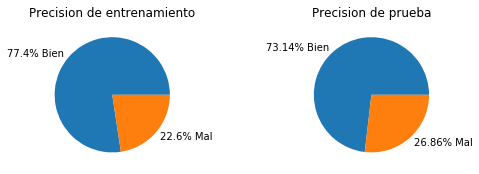

In [13]:
tree_train_score_avg=sum(tree_train_scores)/150
tree_test_score_avg=sum(tree_test_scores)/150

train_scores = plt.axes([0, 0, 0.5, 0.5])
_ = plt.pie([tree_train_score_avg, 1-tree_train_score_avg], 
            labels=[str(round(tree_train_score_avg*100,2))+'% Bien',
                    str(round((1-tree_train_score_avg)*100,2))+'% Mal'])
plt.title('Precision de entrenamiento')

test_scores = plt.axes([0.6, 0, 0.5, 0.5])
_ = plt.pie([tree_test_score_avg, 1-tree_test_score_avg], 
            labels=[str(round(tree_test_score_avg*100,2))+'% Bien',
                    str(round((1-tree_test_score_avg)*100,2))+'% Mal'])
plt.title('Precision de prueba')

### Matriz de confusión

Text(0.5, 1.0, 'Negativos')

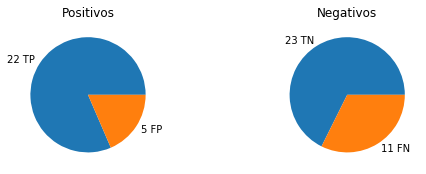

In [14]:
matrixDecisionTree = confusion_matrix(decision_tree_model.predict(test_x), test_y)

positive_confusion_matrix_tree = plt.axes([0, 0, 0.5, 0.5])
_ = plt.pie([matrixDecisionTree[0][0], matrixDecisionTree[1][0]], 
            labels=[str(matrixDecisionTree[0][0])+' TP', str(matrixDecisionTree[1][0])+' FP'])
plt.title('Positivos')

negative_confusion_matrix_tree = plt.axes([0.6, 0, 0.5, 0.5])
_ = plt.pie([matrixDecisionTree[1][1], matrixDecisionTree[0][1]], 
            labels=[str(matrixDecisionTree[1][1])+' TN', str(matrixDecisionTree[0][1])+' FN'])
plt.title('Negativos')

### Visualización del modelo generado

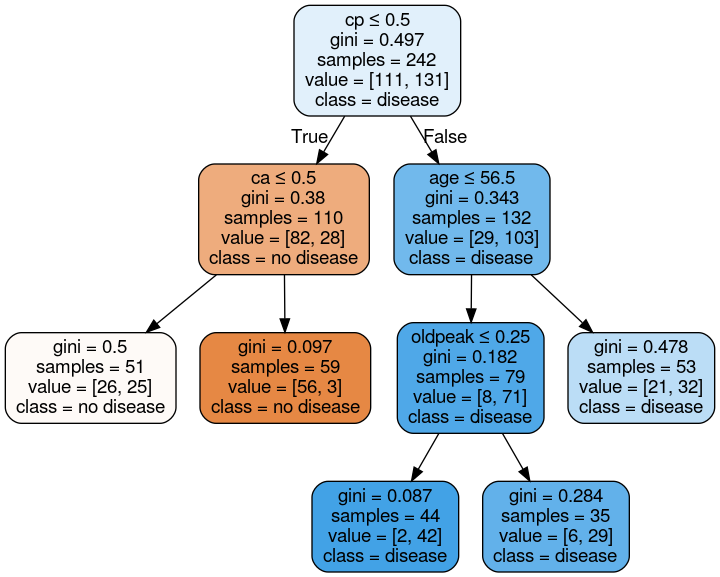

In [15]:
dot_data = StringIO()
export_graphviz(decision_tree_model, out_file=dot_data, filled=True, rounded=True, 
                feature_names = list(train_target.columns[:13]),class_names = ['no disease','disease'], 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Interpretación de los resultados

# Modelo de Bayes

### Entrenamiento del modelo de Bayes

In [16]:
gaussian_naive_bayes=GaussianNB()
gaussian_model=gaussian_naive_bayes.fit(train_x, train_y)

bayes_train_scores, bayes_test_scores=[], []
for i in range(150):
    bayes_train_scores.append(gaussian_model.score(train_x, train_y))
    bayes_test_scores.append(gaussian_model.score(test_x, test_y))
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2)
    gaussian_model=gaussian_naive_bayes.fit(train_x, train_y)

### Precisión del modelo de Bayes

Text(0.5, 1.0, 'Precision de prueba')

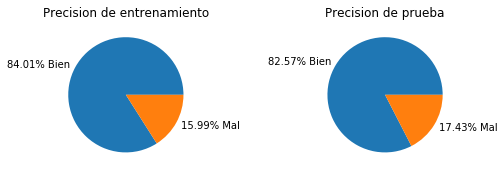

In [17]:
bayes_train_score_avg=sum(bayes_train_scores)/150
bayes_test_score_avg=sum(bayes_test_scores)/150

train_scores = plt.axes([0, 0, 0.5, 0.5])
_ = plt.pie([bayes_train_score_avg, 1-bayes_train_score_avg], 
            labels=[str(round(bayes_train_score_avg*100,2))+'% Bien',
                    str(round((1-bayes_train_score_avg)*100,2))+'% Mal'])
plt.title('Precision de entrenamiento')

test_scores = plt.axes([0.6, 0, 0.5, 0.5])
_ = plt.pie([bayes_test_score_avg, 1-bayes_test_score_avg], 
            labels=[str(round(bayes_test_score_avg*100,2))+'% Bien',
                    str(round((1-bayes_test_score_avg)*100,2))+'% Mal'])
plt.title('Precision de prueba')

### Matriz de confusión

Text(0.5, 1.0, 'Negativos')

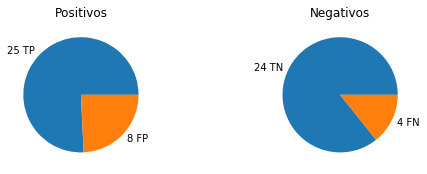

In [20]:
matrixBayesTree = confusion_matrix(gaussian_model.predict(test_x), test_y)

positive_confusion_matrix_tree = plt.axes([0, 0, 0.5, 0.5])
_ = plt.pie([matrixBayesTree[0][0], matrixBayesTree[1][0]], 
            labels=[str(matrixBayesTree[0][0])+' TP', str(matrixBayesTree[1][0])+' FP'])
plt.title('Positivos')

negative_confusion_matrix_tree = plt.axes([0.6, 0, 0.5, 0.5])
_ = plt.pie([matrixBayesTree[1][1], matrixBayesTree[0][1]], 
            labels=[str(matrixBayesTree[1][1])+' TN', str(matrixBayesTree[0][1])+' FN'])
plt.title('Negativos')

# Neural Network

In [27]:
scaler, copy_train_x, copy_test_x= StandardScaler(), train_x.copy(), test_x.copy()
copy_train_x = train_x.copy()
copy_test_x = test_x.copy()
scaler.fit(train_x)  
copy_train_x = scaler.transform(copy_train_x)  
copy_test_x = scaler.transform(copy_test_x)  

neural_network_model = MLPClassifier(
    hidden_layer_sizes = (12,10,8,6,4,2), activation = 'identity',
    solver='adam', alpha=0.01,  max_iter=5000,
    random_state=None, verbose = False)

neural_network_model.fit(copy_train_x, train_y)                         

print(neural_network_model.score(copy_train_x, train_y)*100, "%")
print(neural_network_model.score(copy_test_x, test_y)*100, "%")

print(confusion_matrix(neural_network_model.predict(copy_train_x), train_y))
print(confusion_matrix(neural_network_model.predict(copy_test_x), test_y))

87.19008264462809 %
78.68852459016394 %
[[ 85  11]
 [ 20 126]]
[[24  4]
 [ 9 24]]
